# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load & Inspect Data

In [6]:
df = pd.read_csv("OneDrive/Desktop/car data.csv")
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df = df.dropna() 

# Define Features & Target

In [13]:
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

categorical = ['Fuel_Type', 'Selling_type', 'Transmission']
numeric = [col for col in X.columns if col not in categorical]

# Preprocessing & Model Pipeline

In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop="first"), categorical)
    ], remainder="passthrough"
)

# ML pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
])

# Train-Test Split & Training

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Fuel_Type', 'Selling_type',
                                                   'Transmission'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

# Model Evaluation

In [16]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", round(r2, 3))
print("RMSE:", round(rmse, 3))

R² Score: 0.958
RMSE: 0.979


# Visualizations

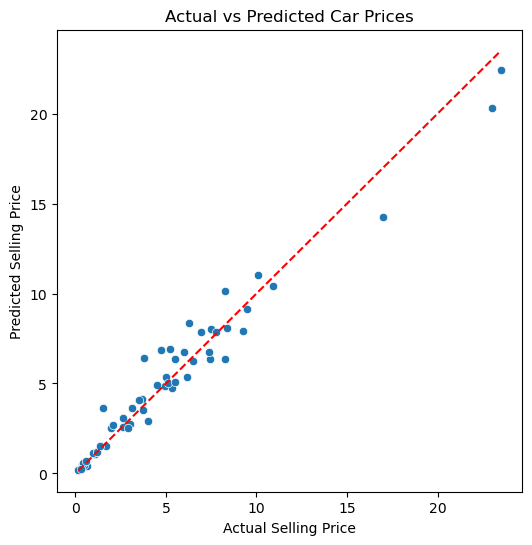

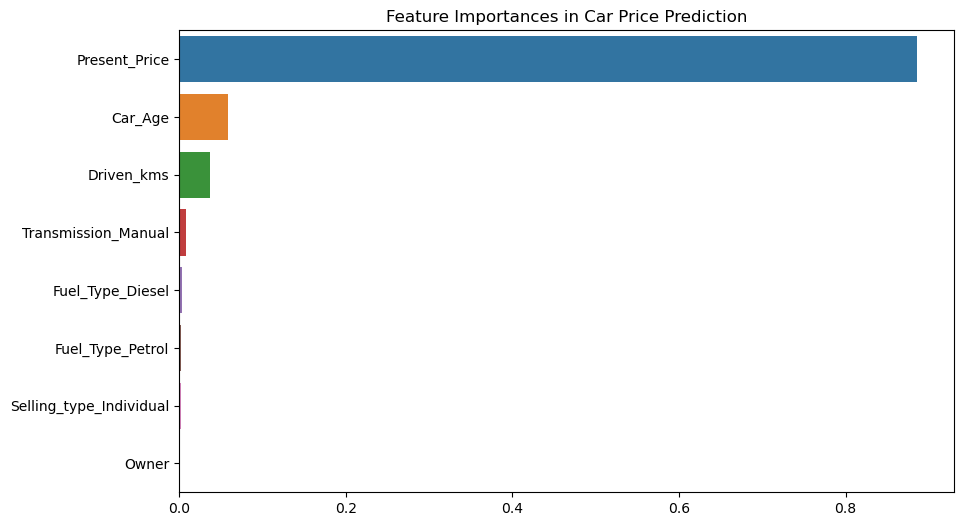

In [17]:
# Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()

# Feature Importances
rf = model.named_steps['regressor']
enc = model.named_steps['preprocessor'].named_transformers_['cat']
feature_names = enc.get_feature_names_out(categorical)
all_features = list(feature_names) + numeric

importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importances in Car Price Prediction")
plt.show()

# 🚙 Car Price Prediction – Project Details

## 1. Objective

The main goal of this project is to predict the selling price of used cars based on their features. This helps:

Car dealers to estimate fair prices.

Buyers to avoid overpaying.

Sellers to know the right selling value.

## 2. Dataset Overview

Rows: 301 (cars).

Columns: 9 (features + target).

Features:

Car_Name → Brand/model of car (removed later because of too many unique values).

Year → Year of purchase (converted to "Car Age").

Selling_Price → Target variable (price of used car in lakhs).

Present_Price → Current showroom price of the car (new).

Driven_kms → Distance driven (car usage).

Fuel_Type → Petrol/Diesel/CNG.

Selling_type → Dealer/Individual.

Transmission → Manual/Automatic.

Owner → Number of previous owners.

## 3. Data Preprocessing

Car Age: Instead of using "Year," a new feature was created → Car_Age = Current Year – Year of Purchase.

Categorical Encoding: Converted Fuel_Type, Selling_type, and Transmission into numerical form using One-Hot Encoding.

Dropped Irrelevant Features: Car_Name was not useful, so removed.

## 4. Model Building 
Input (X): All car features except Selling_Price.

Output (y): Selling_Price.

Train-Test Split: 80% data for training, 20% for testing.

Model Used: Random Forest Regressor

Chosen because it handles both categorical and numerical features well.

Works better on small-to-medium datasets compared to linear models.

## 5. Model Performance¶
R² Score = 0.958 → The model explains 96% of the variance in selling prices.

RMSE = 0.979 → On average, predictions are off by less than 1 lakh.

This means the model is highly accurate for price prediction.

## 6. Key Insights
Car Age: Newer cars (low age) have much higher resale prices.

Present Price: Strongest factor affecting resale value. Expensive cars when new remain more valuable when sold.

Transmission: Automatic cars often have higher resale value compared to manual.

Fuel Type: Petrol cars dominate; diesel resale value is decreasing due to fuel price changes.

Owners: More previous owners = lower resale value.

## 7. Visual Analysis
Trend: Prices drop sharply with car age.

Correlation: Present Price and Car Age are the most important features.

Actual vs Predicted: Predicted prices closely match actual selling prices (points align near diagonal line).

## 8. Applications
Car Dealers: Automate price estimation.

Car Buyers: Check if quoted price is fair.

Car Sellers: Know the correct market value before selling.

## 9. Future Improvements
Add more features like location, insurance type, accident history, brand reputation.

Try advanced models like XGBoost, Gradient Boosting, or Neural Networks.

Deploy as a web app (Streamlit/Flask) so anyone can input details and get predictions instantly.